In [4]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, InputLayer

2024-10-22 15:37:12.121432: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 15:37:12.248926: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 15:37:13.027086: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-22 15:37:15.900551: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
(X_train, _), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [6]:
X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [7]:
np.divide(768, 4)

192.0

**AutoEncoder:** 3072 -> 1536 -> 768 -> 384 -> 768 -> 1536 -> 3072

In [8]:
autoencoder = Sequential()

# Codificador
autoencoder.add(InputLayer(shape=(3072,)))
autoencoder.add(Dense(units=1536, activation='relu'))
autoencoder.add(Dense(units=768, activation='relu'))
# autoencoder.add(Dense(units=384, activation='relu'))

# autoencoder.add(Dense(units=768, activation='relu'))
autoencoder.add(Dense(units=1536, activation='relu'))
autoencoder.add(Dense(units=3072, activation='sigmoid'))

autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1536)           │     4,720,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 768)            │     1,180,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1536)           │     1,181,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3072)           │     4,721,664 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,803,392 (45.03 MB)

 Trainable params: 11,803,392 (45.03 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

2024-10-22 15:37:27.068746: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-10-22 15:37:30.168216: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.0017 - loss: 0.6497

2024-10-22 15:40:30.408726: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2024-10-22 15:40:31.427483: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


196/196 ━━━━━━━━━━━━━━━━━━━━ 197s 986ms/step - accuracy: 0.0017 - loss: 0.6496 - val_accuracy: 0.0041 - val_loss: 0.6015
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.0042 - loss: 0.6000 - val_accuracy: 0.0056 - val_loss: 0.5870
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 191s 794ms/step - accuracy: 0.0059 - loss: 0.5859 - val_accuracy: 0.0066 - val_loss: 0.5821
Epoch 4/50
 71/196 ━━━━━━━━━━━━━━━━━━━━ 2:18 1s/step - accuracy: 0.0067 - loss: 0.5790

In [6]:
original_dimension = Input(shape=(3072,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(original_dimension, encoder_layer3(encoder_layer2(encoder_layer1(original_dimension))))

encoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1536)           │     4,720,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 768)            │     1,180,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 384)            │       295,296 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,195,840 (23.64 MB)

 Trainable params: 6,195,840 (23.64 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
codified_images = encoder.predict(X_test)

2024-10-22 14:15:31.431128: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


In [8]:
decodified_images = autoencoder.predict(X_test)

2024-10-22 14:15:47.274748: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


2024-10-22 14:15:58.989739: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


In [3]:
import numpy as np
n = 768

# Encontrando os divisores
divisores = np.arange(1, n + 1)  # Cria um array de 1 a 384
list(filter(lambda x: n % x == 0, divisores))

[1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64, 96, 128, 192, 256, 384, 768]

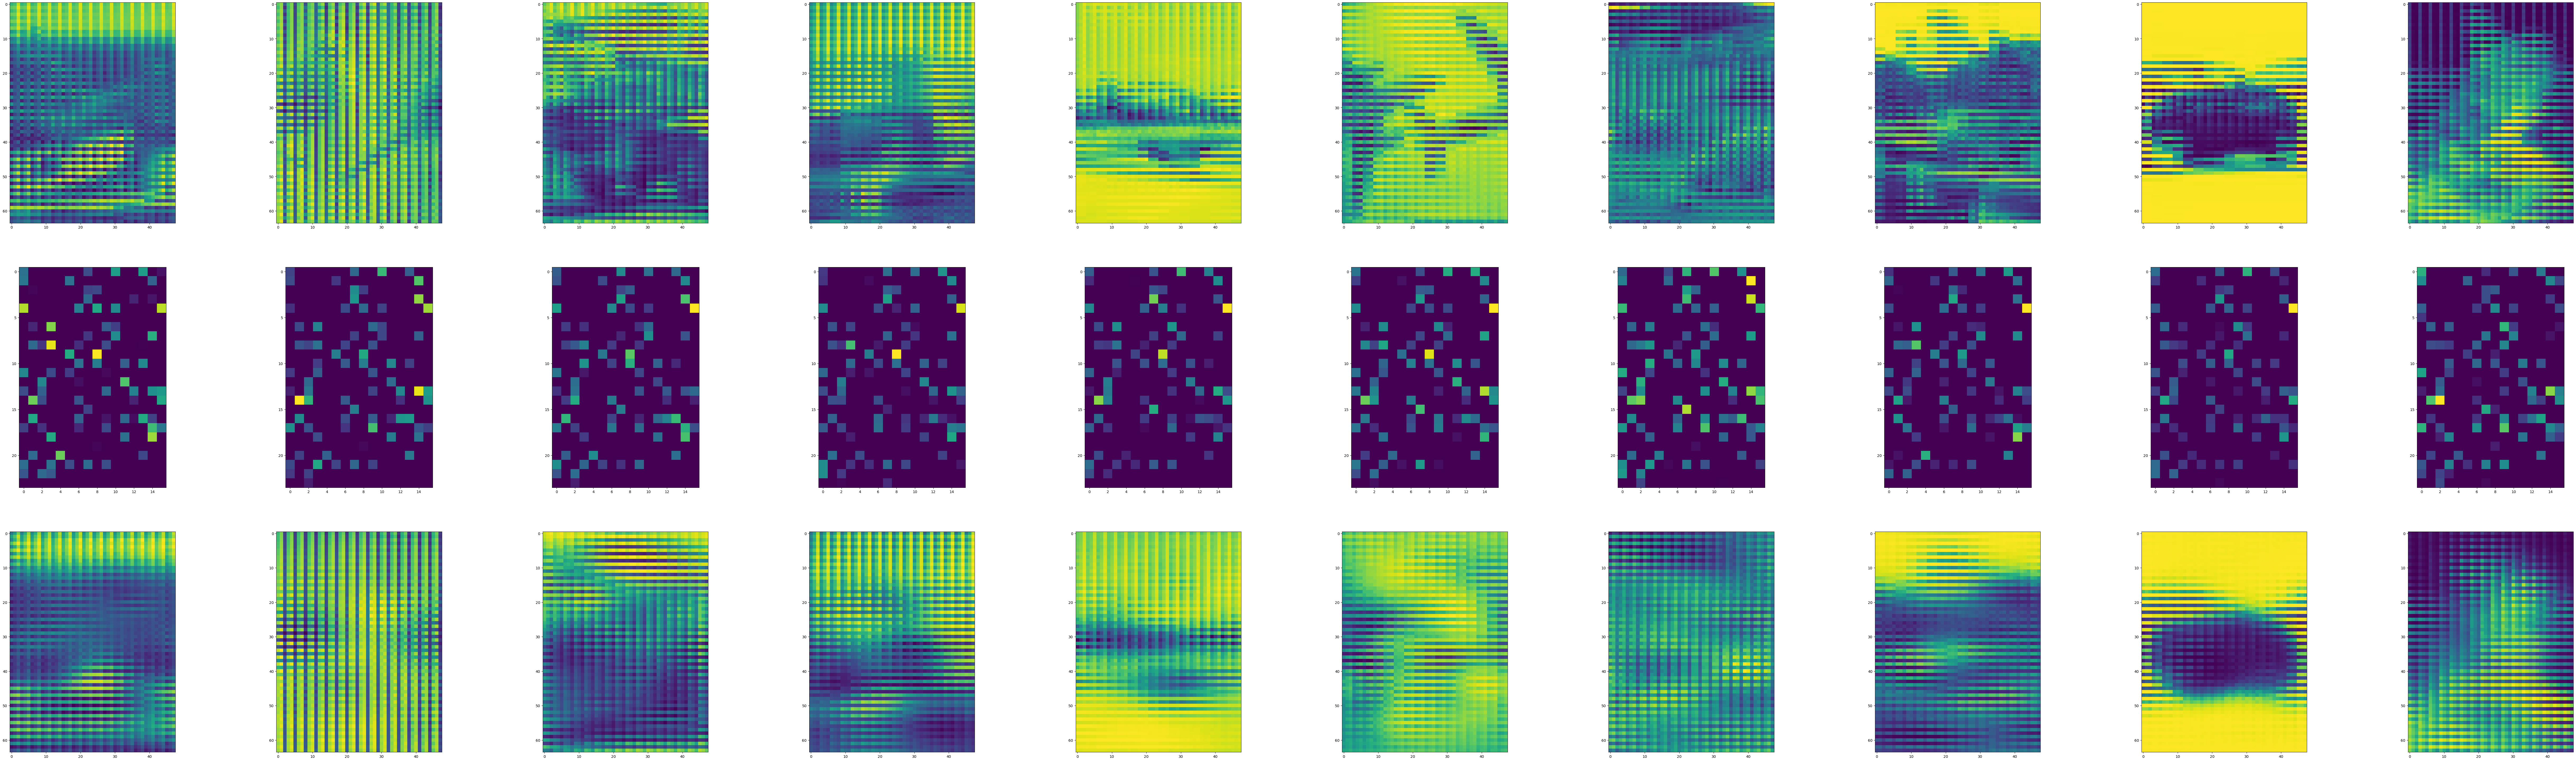

In [41]:
images_num = 10
test_images = np.random.randint(X_test.shape[0], size=images_num)
plt.figure(figsize=(128, 128))

for i, image_idx in enumerate(test_images):
    #Imagem Orginal
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(X_test[image_idx].reshape(64, 48))
    plt.xticks()
    plt.yticks()
    
    #Imagem Codificada
    eixo = plt.subplot(10, 10, i + 1 + images_num)
    plt.imshow(codified_images[image_idx].reshape(24, 16))
    plt.xticks()
    plt.yticks()
    
    #Imagem Orginal
    eixo = plt.subplot(10, 10, i + 1 + images_num * 2)
    plt.imshow(decodified_images[image_idx].reshape(64, 48))
    plt.xticks()
    plt.yticks()